# NBA Player Stats Dataset for the 2023-2024

This dataset provides comprehensive statistics for NBA players during the 2023-2024 regular season. It encompasses over 400 rows and 30 columns, presenting a wide range of player performance metrics. The data is derived from Basketball Reference, ensuring accuracy and reliability. 

However, it's worth noting that there may be duplicate player names due to team changes throughout the season (Which will show TOT for the total status of the player).

Columns Description:

- Rk: Rank
- Player: Player's name
- Pos: Position
- Age: Player's age
- Tm: Team
- G: Games played
- GS: Games started
- MP: Minutes played per game
- FG: Field goals per game
- FGA: Field goal attempts per game
- FG%: Field goal percentage
- 3P: 3-point field goals per game
- 3PA: 3-point field goal attempts per game
- 3P%: 3-point field goal percentage
- 2P: 2-point field goals per game
- 2PA: 2-point field goal attempts per game
- 2P%: 2-point field goal percentage
- eFG%: Effective field goal percentage
- FT: Free throws per game
- FTA: Free throw attempts per game
- FT%: Free throw percentage
- ORB: Offensive rebounds per game
- DRB: Defensive rebounds per game
- TRB: Total rebounds per game
- AST: Assists per game
- STL: Steals per game
- BLK: Blocks per game
- TOV: Turnovers per game
- PF: Personal fouls per game
- PTS: Points per game

Acknowledgements

Reference: [basketball-reference.com](basketball-reference.com)

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import os
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
dataset_path = r'C:\Users\Ignatius Lanang\projects_master\DA Test - Perqara\datasets'

#Listing the filenames to ensure correct versions are used for each month
filenames = [
    "NBA_2024_per_game(03-01-2024).csv",
    "NBA_2024_per_game(04-12-2023).csv",
    "NBA_2024_per_game(05-12-2023).csv",
    "NBA_2024_per_game(13-11-2023 Updated).csv",
    "NBA_2024_per_game(15-11-2023 Updated).csv",
    "NBA_2024_per_game(17-11-2023).csv",
    "NBA_2024_per_game(20-11-2023).csv",
    "NBA_2024_per_game(22-11-2023).csv",
    "NBA_2024_per_game(26-01-2024).csv",
    "NBA_2024_per_game(27-12-2023).csv",
    "NBA_2024_per_game(28-11-2023).csv"
]

#Define the most recent file for each month manually
most_recent_files = {
    "01-2024": "NBA_2024_per_game(26-01-2024).csv",
    "12-2023": "NBA_2024_per_game(27-12-2023).csv",
    "11-2023": "NBA_2024_per_game(22-11-2023).csv", # Latest updated file for November
}

#List to store the selected DataFrames
monthly_dataframes = []

#Load and combine the selected files
for key, filename in most_recent_files.items():
    filepath = os.path.join(dataset_path, filename)
    month_data = pd.read_csv(filepath)
    month_data['Month'] = key
    monthly_dataframes.append(month_data)

#Combine all monthly Dataframes into a single Dataframe
df = pd.concat(monthly_dataframes, ignore_index=True)

In [3]:
# Define the output CSV file path
output_csv_path = r'C:\Users\Ignatius Lanang\projects_master\DA Test - Perqara\combined_dataset.csv'

# Save the combined DataFrame to a new CSV file
df.to_csv(output_csv_path, index=False)

print(f"Combined dataset saved successfully to {output_csv_path}")

Combined dataset saved successfully to C:\Users\Ignatius Lanang\projects_master\DA Test - Perqara\combined_dataset.csv


In [3]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Month
0,Precious Achiuwa,C-PF,24,TOT,37,0,16.2,2.8,5.8,0.479,...,2.0,3.2,5.2,1.3,0.5,0.5,1.0,1.6,6.6,01-2024
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,01-2024
2,Precious Achiuwa,PF,24,NYK,12,0,13.7,2.0,3.6,0.558,...,2.0,2.6,4.6,0.4,0.3,0.6,0.8,1.5,4.3,01-2024
3,Bam Adebayo,C,26,MIA,34,34,35.1,7.8,15.6,0.498,...,2.3,8.3,10.6,4.4,1.1,1.0,2.5,2.6,21.4,01-2024
4,Ochai Agbaji,SG,23,UTA,45,10,20.1,2.2,5.1,0.435,...,0.8,1.8,2.5,0.9,0.6,0.6,0.7,1.4,5.8,01-2024


In [4]:
df.tail()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Month
1583,Thaddeus Young,PF,35,TOR,3,0,3.3,0.7,1.3,0.500,...,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.0,1.3,11-2023
1584,Trae Young,PG,25,ATL,11,11,35.7,6.3,17.6,0.356,...,0.6,2.0,2.6,11.1,1.5,0.0,4.1,1.5,23.4,11-2023
1585,Omer Yurtseven,C,25,UTA,7,0,4.6,1.0,1.4,0.700,...,0.4,1.1,1.6,0.4,0.0,0.1,0.1,0.9,2.3,11-2023
1586,Cody Zeller,C,31,NOP,11,0,8.3,0.6,1.9,0.333,...,1.2,2.2,3.4,0.9,0.2,0.1,0.4,0.9,1.7,11-2023
1587,Ivica Zubac,C,26,LAC,12,12,25.7,4.2,7.1,0.588,...,2.9,5.6,8.5,0.8,0.2,1.6,1.3,2.9,10.3,11-2023


In [5]:
df.shape

(1588, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1588 non-null   object 
 1   Pos     1588 non-null   object 
 2   Age     1588 non-null   int64  
 3   Tm      1588 non-null   object 
 4   G       1588 non-null   int64  
 5   GS      1588 non-null   int64  
 6   MP      1588 non-null   float64
 7   FG      1588 non-null   float64
 8   FGA     1588 non-null   float64
 9   FG%     1559 non-null   float64
 10  3P      1588 non-null   float64
 11  3PA     1588 non-null   float64
 12  3P%     1428 non-null   float64
 13  2P      1588 non-null   float64
 14  2PA     1588 non-null   float64
 15  2P%     1524 non-null   float64
 16  eFG%    1559 non-null   float64
 17  FT      1588 non-null   float64
 18  FTA     1588 non-null   float64
 19  FT%     1383 non-null   float64
 20  ORB     1588 non-null   float64
 21  DRB     1588 non-null   float64
 22  

In [7]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Month'],
      dtype='object')

In [8]:
df.isna().sum()

Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        29
3P          0
3PA         0
3P%       160
2P          0
2PA         0
2P%        64
eFG%       29
FT          0
FTA         0
FT%       205
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Month       0
dtype: int64

We have 3 columns that have missing values. FG%, 3P%, FT%. There are 2 scenarios where we can handle these missing values. 
- Replacing them with 0. This approach is appropriate when missing values represent a true absence of the measured quantity (e.g., a player didn't attempt any free throws, so the free throw percentage is missing).
- Drop missing values. This approach is suitable when missing values are likely due to data entry errors or other issues that make imputation unreliable.

Thus, we will replace the missing values with 0 to retain all rows in the dataset.

In [9]:
#handling missing values
df.fillna(0, inplace=True)

In [10]:
# Ensure consistency - Strip whitespace from column names
df.columns = df.columns.str.strip()

In [11]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1588 non-null   object 
 1   Pos     1588 non-null   object 
 2   Age     1588 non-null   int64  
 3   Tm      1588 non-null   object 
 4   G       1588 non-null   int64  
 5   GS      1588 non-null   int64  
 6   MP      1588 non-null   float64
 7   FG      1588 non-null   float64
 8   FGA     1588 non-null   float64
 9   FG%     1588 non-null   float64
 10  3P      1588 non-null   float64
 11  3PA     1588 non-null   float64
 12  3P%     1588 non-null   float64
 13  2P      1588 non-null   float64
 14  2PA     1588 non-null   float64
 15  2P%     1588 non-null   float64
 16  eFG%    1588 non-null   float64
 17  FT      1588 non-null   float64
 18  FTA     1588 non-null   float64
 19  FT%     1588 non-null   float64
 20  ORB     1588 non-null   float64
 21  DRB     1588 non-null   float64
 22  

## Exploratory Data Analysis (EDA)

We want to perform an EDA to identify key trends and insights by focusing on player performance metrics. 

Curious questions: 
- Who scored the most points per game?
- Who has the most assists per game?
- Who has the most rebounds per game?
- Comparative Analysis Based on Key Metrics
- Effective Field Goal Percentage vs Points per Game
- Distribution of Points per Game by Month
- Distribution of Player Ages
- Team Performance Analysis from November 2023 - January 2024
- Impact of Experience (Age) in Performance
- Playing Time & Performance


### Player Performance

#### Who scored the most points per game?

In [13]:
points_vs_minutes = df[['Player', 'MP', 'PTS', 'Month']].sort_values(by=['MP','PTS'], ascending=False)
points_vs_minutes

,Player,MP,PTS,Month
1375,Tyrese Maxey,38.1,26.8,11-2023
1051,Fred VanVleet,37.9,17.1,12-2023
320,Tyrese Maxey,37.7,25.8,01-2024
870,Tyrese Maxey,37.4,25.9,12-2023
1491,Shaedon Sharpe,37.3,17.7,11-2023
...,...,...,...,...
475,Javonte Smart,1.0,0.0,01-2024
1003,Dmytro Skapintsev,1.0,0.0,12-2023
1005,Javonte Smart,1.0,0.0,12-2023
1305,Gregory Jackson II,1.0,0.0,11-2023


In [14]:
fig = px.scatter(df, x='MP', y='PTS', color='Month',
                 hover_data=['Player'],
                 labels={
                     'MP': 'Minutes Played per Game',
                     'PTS': 'Points per Game'
                 },
                 title='Points per Game vs. Minutes Played per Game')

fig.show()

#### Who has the most Assists Per Game?

In [15]:
assists_vs_turnovers = df[['Player', 'AST', 'TOV', 'Month']].sort_values(by=['AST','TOV'], ascending=False)
assists_vs_turnovers

,Player,AST,TOV,Month
194,Tyrese Haliburton,12.6,2.5,01-2024
749,Tyrese Haliburton,12.2,2.8,12-2023
1263,Tyrese Haliburton,11.6,2.3,11-2023
1096,Trae Young,11.2,4.2,12-2023
1584,Trae Young,11.1,4.1,11-2023
...,...,...,...,...
1515,Terry Taylor,0.0,0.0,11-2023
1516,Garrett Temple,0.0,0.0,11-2023
1519,Daniel Theis,0.0,0.0,11-2023
1547,Ish Wainright,0.0,0.0,11-2023


In [16]:
fig = px.scatter(df, x='AST', y='TOV', color='Month',
                 hover_data=['Player'],
                 labels={
                     'AST': 'Assists per Game',
                     'TOV': 'Turnovers per Game'
                 },
                 title='Assists per Game vs. Turnovers per Game')

fig.show()


#### Who has the most Rebounds Per Game?

In [17]:
rebounds_vs_points = df[['Player', 'TRB', 'PTS', 'Month']].sort_values(by=['TRB','PTS'], ascending=False)
rebounds_vs_points


,Player,TRB,PTS,Month
1319,Nikola Jokić,13.1,27.4,11-2023
449,Domantas Sabonis,12.8,20.0,01-2024
1476,Domantas Sabonis,12.7,20.0,11-2023
178,Rudy Gobert,12.5,13.3,01-2024
683,Anthony Davis,12.4,24.9,12-2023
...,...,...,...,...
1268,Ron Harper Jr.,0.0,0.0,11-2023
1305,Gregory Jackson II,0.0,0.0,11-2023
1318,Keyontae Johnson,0.0,0.0,11-2023
1547,Ish Wainright,0.0,0.0,11-2023


In [18]:
fig = px.scatter(df, x='TRB', y='PTS', color='Month',
                 hover_data=['Player'],
                 labels={
                     'TRB': 'Total Rebounds per Game',
                     'PTS': 'Points per Game'
                 },
                 title='Total Rebounds per Game vs. Points per Game')

fig.show()


#### Comparative Analysis Based on Key Metrics

In [19]:
df_jan_2024 = df[df['Month'] == '01-2024']

df_jan_2024

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Month
0,Precious Achiuwa,C-PF,24,TOT,37,0,16.2,2.8,5.8,0.479,...,2.0,3.2,5.2,1.3,0.5,0.5,1.0,1.6,6.6,01-2024
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,01-2024
2,Precious Achiuwa,PF,24,NYK,12,0,13.7,2.0,3.6,0.558,...,2.0,2.6,4.6,0.4,0.3,0.6,0.8,1.5,4.3,01-2024
3,Bam Adebayo,C,26,MIA,34,34,35.1,7.8,15.6,0.498,...,2.3,8.3,10.6,4.4,1.1,1.0,2.5,2.6,21.4,01-2024
4,Ochai Agbaji,SG,23,UTA,45,10,20.1,2.2,5.1,0.435,...,0.8,1.8,2.5,0.9,0.6,0.6,0.7,1.4,5.8,01-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Thaddeus Young,PF,35,TOR,16,3,12.4,1.8,3.3,0.528,...,0.9,1.6,2.5,2.0,0.9,0.1,0.4,1.4,3.8,01-2024
571,Trae Young,PG,25,ATL,39,39,36.3,8.3,19.7,0.422,...,0.5,2.5,3.0,10.8,1.4,0.2,4.3,2.0,26.9,01-2024
572,Omer Yurtseven,C,25,UTA,24,6,10.7,1.6,3.2,0.500,...,1.5,2.8,4.3,0.5,0.2,0.4,0.9,1.4,3.5,01-2024
573,Cody Zeller,C,31,NOP,31,0,8.5,0.6,1.6,0.400,...,1.2,1.6,2.8,1.1,0.2,0.1,0.4,1.2,2.0,01-2024


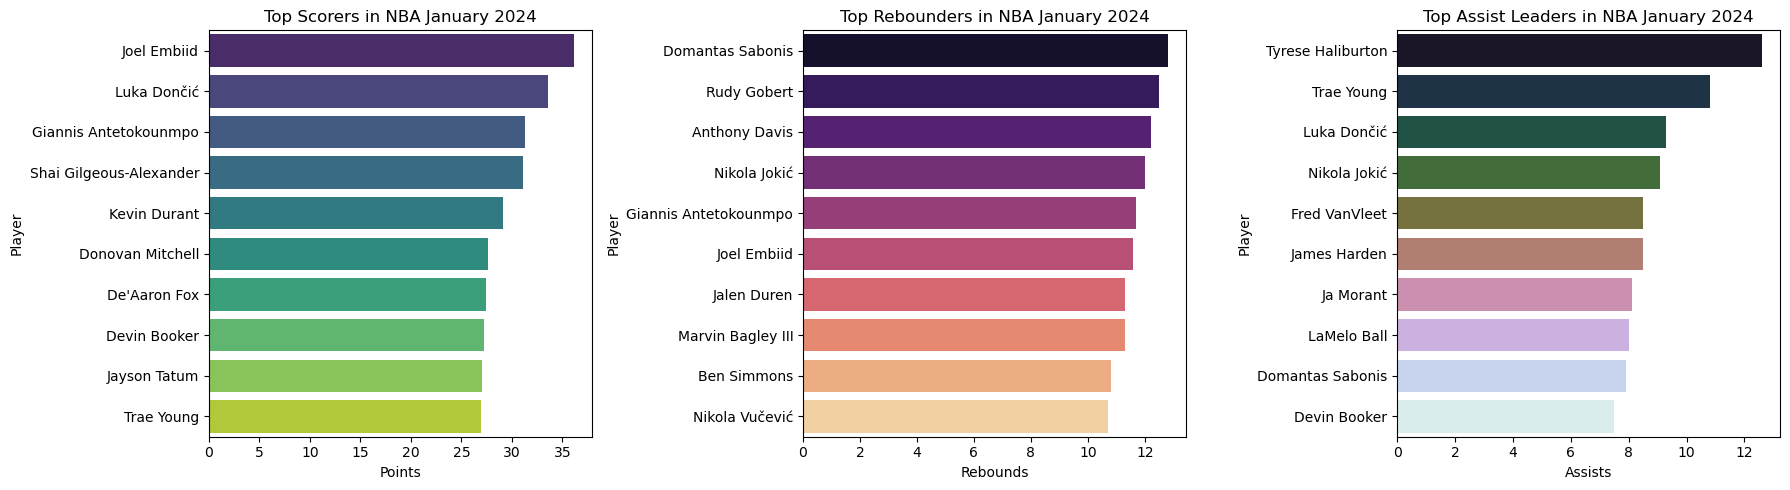

In [20]:
# Comparing top performers in key categories
top_scorers_2024 = df_jan_2024[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(10)
top_rebounders_2024 = df_jan_2024[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(10)
top_assist_leaders_2024 = df_jan_2024[['Player', 'AST']].sort_values(by='AST', ascending=False).head(10)

# Visualizing comparisons in points, rebounds, and assists
plt.figure(figsize=(18, 5))

# Top Scorers
plt.subplot(1, 3, 1)
sns.barplot(x='PTS', y='Player', data=top_scorers_2024, palette='viridis')
plt.title('Top Scorers in NBA January 2024')
plt.xlabel('Points')
plt.ylabel('Player')

# Top Rebounders
plt.subplot(1, 3, 2)
sns.barplot(x='TRB', y='Player', data=top_rebounders_2024, palette='magma')
plt.title('Top Rebounders in NBA January 2024')
plt.xlabel('Rebounds')
plt.ylabel('Player')

# Top Assist Leaders
plt.subplot(1, 3, 3)
sns.barplot(x='AST', y='Player', data=top_assist_leaders_2024, palette='cubehelix')
plt.title('Top Assist Leaders in NBA January 2024')
plt.xlabel('Assists')
plt.ylabel('Player')

plt.tight_layout()
plt.show()

#### Effective Field Goal Percentage vs. Points per Game

In [21]:
field_goal_percentage_vs_points = df[['Player', 'eFG%', 'PTS', 'Month']].sort_values(by=['eFG%','PTS'], ascending=False)
field_goal_percentage_vs_points


,Player,eFG%,PTS,Month
382,Jordan Nwora,1.50,3.0,01-2024
395,Drew Peterson,1.50,3.0,01-2024
566,Dylan Windler,1.50,3.0,01-2024
935,Drew Peterson,1.50,3.0,12-2023
1354,Chris Livingston,1.25,2.5,11-2023
...,...,...,...,...
1465,Jerome Robinson,0.00,0.0,11-2023
1487,Brice Sensabaugh,0.00,0.0,11-2023
1547,Ish Wainright,0.00,0.0,11-2023
1566,Lindell Wigginton,0.00,0.0,11-2023


In [22]:
fig = px.scatter(df, x='eFG%', y='PTS', color='Month',
                 hover_data=['Player'],
                 labels={
                     'eFG%': 'Effective Field Goal Percentage',
                     'PTS': 'Points per Game'
                 },
                 title='Effective Field Goal Percentage vs. Points per Game')

fig.show()


#### Distribution of Points per Game by Month

In [23]:
points_by_month = df[['Player', 'Month', 'PTS']].sort_values(by=['Month','PTS'], ascending=False)
points_by_month

,Player,Month,PTS
705,Joel Embiid,12-2023,35.0
693,Luka Dončić,12-2023,33.5
584,Giannis Antetokounmpo,12-2023,30.8
729,Shai Gilgeous-Alexander,12-2023,30.8
699,Kevin Durant,12-2023,30.3
...,...,...,...
413,Micah Potter,01-2024,0.0
473,Dmytro Skapintsev,01-2024,0.0
475,Javonte Smart,01-2024,0.0
508,Jacob Toppin,01-2024,0.0


In [24]:
fig = px.box(df, x='Month', y='PTS',
             hover_data=['Player'],
             labels={
                 'Month': 'Month',
                 'PTS': 'Points per Game'
             },
             title='Distribution of Points per Game by Month')

fig.show()


#### Distribution of Player Ages

In [25]:
age_distribution = df[['Player', 'Age', 'Month']]
age_distribution

,Player,Age,Month
0,Precious Achiuwa,24,01-2024
1,Precious Achiuwa,24,01-2024
2,Precious Achiuwa,24,01-2024
3,Bam Adebayo,26,01-2024
4,Ochai Agbaji,23,01-2024
...,...,...,...
1583,Thaddeus Young,35,11-2023
1584,Trae Young,25,11-2023
1585,Omer Yurtseven,25,11-2023
1586,Cody Zeller,31,11-2023


In [26]:
fig = px.histogram(df, x='Age', nbins=15, title='Distribution of Player Ages')
fig.show()


#### Team Performance Analysis from the November 2023 - January 2024

In [27]:
# Calculate total points for each team per month
team_points_per_month = df.groupby(['Tm', 'Month'])['PTS'].sum().reset_index()

# Calculate mean points per game for each team
team_performance = team_points_per_month.groupby('Tm')['PTS'].mean().reset_index()

team_performance.columns = ['Team', 'Average Points per Game']
print(team_performance)


   Team  Average Points per Game
0   ATL               140.633333
1   BOS               141.166667
2   BRK               161.033333
3   CHI               123.033333
4   CHO               165.166667
5   CLE               152.200000
6   DAL               154.033333
7   DEN               134.400000
8   DET               158.333333
9   GSW               138.733333
10  HOU               136.333333
11  IND               160.566667
12  LAC               156.633333
13  LAL               139.100000
14  MEM               165.966667
15  MIA               166.333333
16  MIL               143.333333
17  MIN               125.433333
18  NOP               161.166667
19  NYK               135.766667
20  OKC               140.433333
21  ORL               139.100000
22  PHI               144.933333
23  PHO               156.900000
24  POR               155.133333
25  SAC               139.800000
26  SAS               131.233333
27  TOR               147.200000
28  TOT                72.633333
29  UTA   

In [28]:
fig = px.bar(team_performance, x='Team', y='Average Points per Game',
             title='Average Points per Game by Team',
             labels={'Average Points per Game': 'Average Points per Game'},
             text='Average Points per Game')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

#### Impact of Experience (Age) in Performance

In [29]:
# Select relevant columns
age_vs_performance = df[['Player', 'Age', 'PTS', 'Month']]
age_vs_performance

,Player,Age,PTS,Month
0,Precious Achiuwa,24,6.6,01-2024
1,Precious Achiuwa,24,7.7,01-2024
2,Precious Achiuwa,24,4.3,01-2024
3,Bam Adebayo,26,21.4,01-2024
4,Ochai Agbaji,23,5.8,01-2024
...,...,...,...,...
1583,Thaddeus Young,35,1.3,11-2023
1584,Trae Young,25,23.4,11-2023
1585,Omer Yurtseven,25,2.3,11-2023
1586,Cody Zeller,31,1.7,11-2023


In [30]:
# Scatter plot of age vs points per game
fig = px.scatter(df, x='Age', y='PTS', title='Impact of Experience (Age) on Performance', hover_data=['Player'])
fig.show()


#### Playing Time & Performance

In [31]:
playing_time_vs_performance = df[['Player', 'MP', 'PTS', 'Month']]
playing_time_vs_performance

,Player,MP,PTS,Month
0,Precious Achiuwa,16.2,6.6,01-2024
1,Precious Achiuwa,17.5,7.7,01-2024
2,Precious Achiuwa,13.7,4.3,01-2024
3,Bam Adebayo,35.1,21.4,01-2024
4,Ochai Agbaji,20.1,5.8,01-2024
...,...,...,...,...
1583,Thaddeus Young,3.3,1.3,11-2023
1584,Trae Young,35.7,23.4,11-2023
1585,Omer Yurtseven,4.6,2.3,11-2023
1586,Cody Zeller,8.3,1.7,11-2023


In [32]:
fig = px.scatter(df, x='MP', y='PTS', title='Playing Time and Performance', hover_data=['Player'])
fig.show()

### Statistical Analysis

In [33]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,...,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,26.000630,17.976700,8.300378,18.450126,3.097292,6.649118,0.441320,0.935894,2.625063,0.289365,...,0.650161,0.841058,2.488665,3.329156,1.961587,0.579723,0.387091,1.001322,1.549244,8.440113
std,4.404915,12.446233,11.957700,10.547285,2.585598,5.273516,0.153098,0.917647,2.300777,0.187335,...,0.301038,0.820570,1.907108,2.550246,1.929909,0.446330,0.450726,0.867406,0.887492,7.162152
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,0.000000,9.000000,1.000000,2.600000,0.397000,0.100000,0.700000,0.197000,...,0.563000,0.300000,1.000000,1.400000,0.600000,0.200000,0.100000,0.400000,0.900000,2.900000
50%,25.000000,14.000000,1.000000,17.600000,2.400000,5.100000,0.455000,0.700000,2.100000,0.333000,...,0.750000,0.600000,2.100000,2.800000,1.300000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,29.000000,28.000000,13.000000,27.800000,4.600000,9.700000,0.504000,1.500000,4.000000,0.390000,...,0.842000,1.100000,3.500000,4.500000,2.700000,0.900000,0.500000,1.400000,2.200000,12.400000
max,39.000000,45.000000,45.000000,38.100000,12.100000,23.700000,1.000000,5.500000,12.200000,1.000000,...,1.000000,6.100000,10.300000,13.100000,12.600000,2.800000,3.300000,4.800000,4.000000,36.100000


#### Correlation Matrix

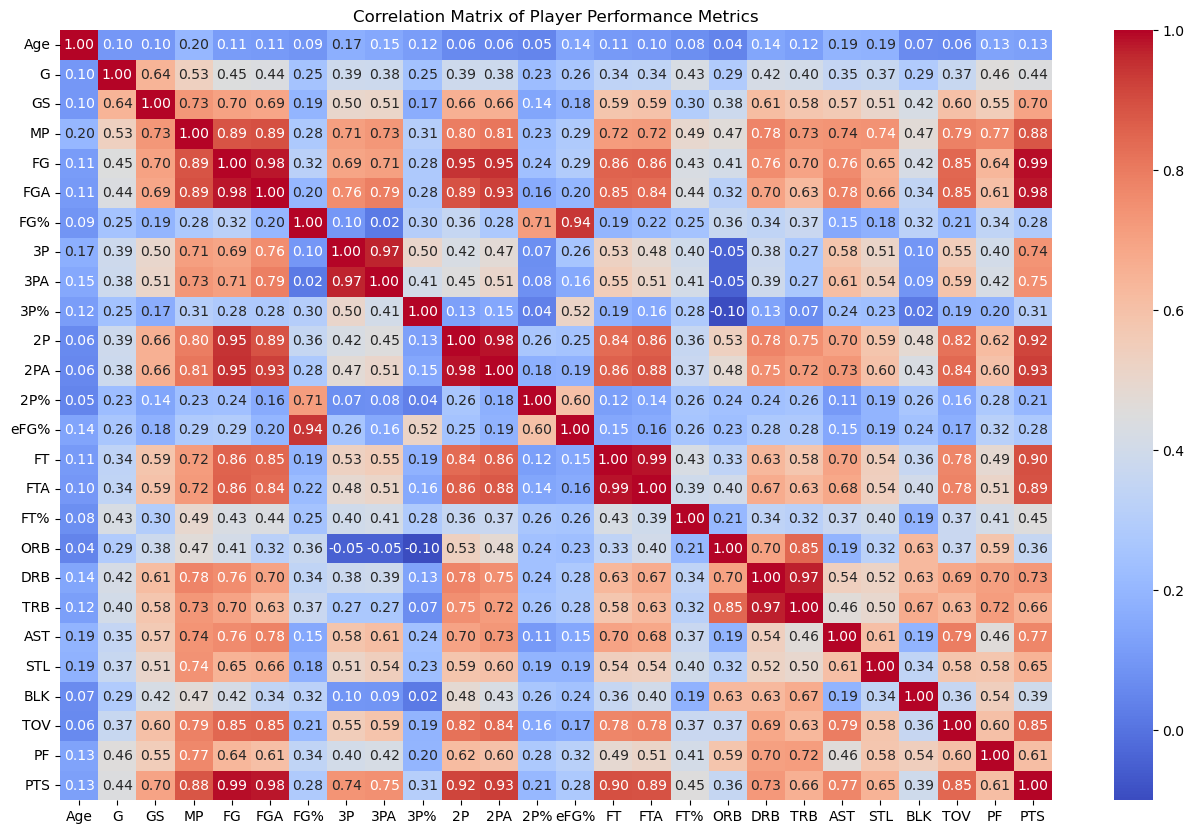

In [34]:
plt.figure(figsize=(16, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Player Performance Metrics')
plt.show()

High Correlation with Points Per Game (PTS):

- Field Goals (FG): There is a very high correlation (0.99) between points per game (PTS) and field goals per game (FG). This is expected since field goals contribute significantly to a player's scoring.
- Field Goal Attempts (FGA): The correlation between PTS and FGA is also very high (0.98). More attempts generally lead to more points.
- Free Throws (FT): The correlation between PTS and FT is high (0.89). Free throws contribute to the total points scored by a player.
- Minutes Played (MP): There is a strong correlation (0.85) between PTS and MP. Players who play more minutes tend to score more points.

Field Goal Metrics:

- Field Goals (FG) and Field Goal Attempts (FGA): These are highly correlated (0.95). Players who attempt more field goals generally make more.
- Field Goals (FG) and Effective Field Goal Percentage (eFG%): There is a high correlation (0.86). Effective field goal percentage accounts for the extra value of 3-point shots, which is reflected in field goals made.

Rebounding Metrics:

- Offensive Rebounds (ORB) and Defensive Rebounds (DRB): There is a moderate correlation (0.53). While both contribute to total rebounds (TRB), they represent different aspects of the game.
- Defensive Rebounds (DRB) and Total Rebounds (TRB): There is a very high correlation (0.97), as expected since DRB is a significant part of TRB.
- Offensive Rebounds (ORB) and Total Rebounds (TRB): There is a high correlation (0.85), showing that offensive rebounds contribute significantly to the total rebounds.

Assists (AST):

- Assists (AST) have a strong correlation with minutes played (0.73) and games started (0.57). Players who play more and start games tend to have more assists.
- There is also a moderate correlation between assists (AST) and points per game (PTS) (0.65), suggesting that players who assist more often also tend to score more.

Turnovers (TOV):

- Turnovers are moderately correlated with minutes played (0.78) and points per game (0.85). Players who handle the ball more often (play more minutes, score more points) tend to have more turnovers.

Shooting Percentages:

- 3-Point Percentage (3P%) and Field Goal Percentage (FG%): There is a moderate correlation (0.71). Players who shoot well from three often have a higher overall field goal percentage.
- 2-Point Percentage (2P%) and Field Goal Percentage (FG%): There is a high correlation (0.93). Since 2-point shots make up a significant portion of field goals, good 2-point shooters tend to have a higher field goal percentage.

Summary
- Scoring: Points per game are highly influenced by field goals, field goal attempts, free throws, and minutes played.
- Rebounding: Total rebounds are heavily influenced by both offensive and defensive rebounds.
- Assists and Turnovers: Players who play more and are more involved in the game tend to have higher assists and turnovers.
- Shooting Efficiency: Effective field goal percentage is a good indicator of a player's overall shooting ability, incorporating both 2-point and 3-point shooting.

## Linear Regression Analysis

Based on the correlation matrix, there are some target variables we can use to predict future performances.
- Predicting Points per Game
- Predicting Shooting Efficiency
- Predicting Rebound Analysis
- Predicting Assists and Turnover Relationship.

#### Predicting Points per Game
Predicting points per game (PTS) using various scoring-related metrics that can provide insights into offensive productivity:

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math

In [36]:
# Define your independent variables (features) and dependent variable (target)
X = df[['FG', 'FGA', 'FT', 'MP', '3P', '3PA', '2P', '2PA']]
y = df['PTS']

In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [39]:
model.coef_

array([ 1.74593067e+00, -4.97532748e-02,  1.00387857e+00, -4.16777583e-04,
        1.23493723e+00,  5.70470677e-02,  2.51542176e-01,  5.10717466e-02])

In [40]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])
cdf

,Coef
FG,1.745931
FGA,-0.049753
FT,1.003879
MP,-0.000417
3P,1.234937
3PA,0.057047
2P,0.251542
2PA,0.051072


In [41]:
# Predict on the test data
y_pred = model.predict(X_test)

y_pred


array([ 8.98686036e+00,  9.99867824e-01,  1.76015463e+01,  2.69224741e+00,
        1.46943542e+01,  6.16695508e+00,  1.66882189e+00, -3.06058707e-03,
        8.19463279e+00,  1.69644176e+00,  1.14142573e+01,  2.38787441e+00,
        1.31928006e+00,  4.59850223e+00,  3.58950719e+00,  4.97824586e+00,
        2.43932771e+01,  1.36858188e+01,  1.11956966e+01,  2.99210674e+00,
        1.12654872e+01,  3.57123091e+00,  3.98937142e-01,  8.66535810e+00,
        2.25051524e+01,  9.79574216e+00,  5.29918775e+00,  3.80372507e+00,
        1.19628767e+00,  4.79799928e+00,  3.99757906e+00,  4.19648033e+00,
        4.19748853e+00,  3.58845489e+00,  1.67310993e+00,  5.59336327e+00,
        1.29241305e+00,  7.39045936e+00,  2.95766041e+01,  8.09559317e+00,
        3.49479579e+00,  1.00906260e+01,  1.50697895e+01,  4.11827624e+00,
        8.19334030e+00,  1.39448687e+00,  1.72677041e+01,  1.99997080e+00,
        1.39859137e+01,  1.96825619e+00,  1.79495760e+00,  1.43955504e+01,
        3.09434307e+00,  

Text(0.5, 1.0, 'Evaluation of Our LM Model')

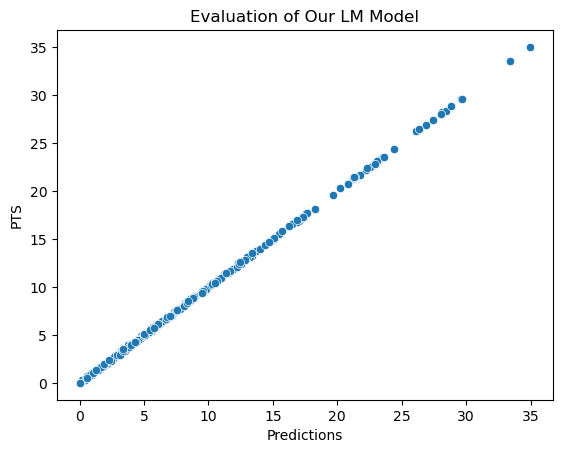

In [42]:
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Our LM Model")

In [43]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.005056729128996215
R-squared: 0.9999007854252795
RMSE:  0.07111068224251695


MSE
- This value is relatively low, suggesting that on average, the squared difference between the predicted and actual values of the target variable.

R-squared
- This value is very close to 1, indicating that your regression model explains approximately 99.99% of the variance in the dependent variable. 

RMSE
- This value represents the average magnitude of the errors in predicting the target variable. A lower RMSE indicates better model performance.

#### Predicting Shooting Efficiency

In [44]:
X_efg = df[['FG', '3P', '3PA']]
y_efg = df['eFG%']

In [45]:
# Split data into training and testing sets
Xefg_train, Xefg_test, yefg_train, yefg_test = train_test_split(X_efg, y_efg, test_size=0.2, random_state=42)

In [46]:
# Create a linear regression model
model_efg = LinearRegression()

# Fit the model using the training data
model_efg.fit(Xefg_train, yefg_train)

LinearRegression()

In [47]:
model_efg.coef_

array([ 0.02161492,  0.30900696, -0.12517945])

In [48]:
# Predict on the test data
yefg_pred = model_efg.predict(Xefg_test)

yefg_pred


array([0.5154391 , 0.38320134, 0.48833526, 0.48516907, 0.61913201,
       0.50654564, 0.50155899, 0.48135207, 0.43545847, 0.45597886,
       0.53770853, 0.57059834, 0.49802434, 0.47742511, 0.52396224,
       0.6274021 , 0.61690455, 0.55945727, 0.50701134, 0.51377445,
       0.50752649, 0.44082827, 0.41056739, 0.5133473 , 0.58616337,
       0.4800816 , 0.46254217, 0.39737479, 0.4833449 , 0.45393104,
       0.42906382, 0.47248246, 0.39288314, 0.48047391, 0.50155899,
       0.46611166, 0.44500273, 0.59695241, 0.65598007, 0.47750395,
       0.46150634, 0.54493735, 0.54539751, 0.52766555, 0.46042467,
       0.4074489 , 0.53230389, 0.37778754, 0.59015446, 0.52659488,
       0.37267623, 0.45245707, 0.50945146, 0.44197778, 0.46395017,
       0.61764517, 0.37728155, 0.37773256, 0.45207204, 0.66192371,
       0.47579346, 0.48135207, 0.66124163, 0.48712705, 0.57661167,
       0.48135207, 0.44175043, 0.6867945 , 0.50020968, 0.45905151,
       0.41300023, 0.43293579, 0.45872517, 0.57514869, 0.41179

Text(0.5, 1.0, 'Evaluation of Our LM Model')

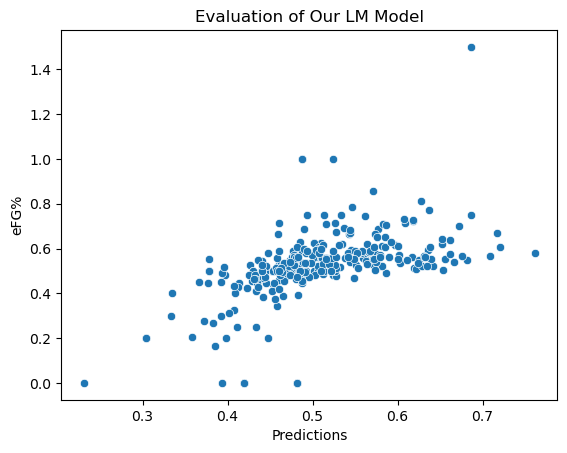

In [49]:
sns.scatterplot(x=yefg_pred, y=yefg_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Our LM Model")

In [50]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(yefg_test, yefg_pred))
print("R-squared:", r2_score(yefg_test, yefg_pred))
print("RMSE: ", math.sqrt(mean_squared_error(yefg_test, yefg_pred)))

Mean Squared Error: 0.024022694884922122
R-squared: 0.24317031775699116
RMSE:  0.1549925639665404


#### Predicting Rebound Analysis

In [51]:
X_trb = df[['ORB', 'DRB', 'MP']]
y_trb = df['TRB']

# Split data into training and testing sets
Xtrb_train, Xtrb_test, ytrb_train, ytrb_test = train_test_split(X_trb, y_trb, test_size=0.2, random_state=42)

In [52]:
# Create a linear regression model
model_trb = LinearRegression()

# Fit the model using the training data
model_trb.fit(Xtrb_train, ytrb_train)

LinearRegression()

In [53]:
model_trb.coef_

array([9.97651052e-01, 1.00036567e+00, 2.63142172e-05])

In [54]:
# Predict on the test data
ytrb_pred = model_trb.predict(Xtrb_test)

ytrb_pred

array([3.79939278e+00, 1.20000587e+00, 5.59836653e+00, 2.19888487e+00,
       3.30073609e+00, 2.20035270e+00, 7.00584796e-01, 2.00106017e+00,
       3.80151974e+00, 5.00587974e-01, 1.80127080e+00, 1.00077870e+00,
       1.09995089e+00, 1.80016959e+00, 1.70046238e+00, 3.20035964e+00,
       4.50033377e+00, 4.29949930e+00, 5.79888038e+00, 1.99705403e+00,
       2.20115350e+00, 1.10009562e+00, 6.00516652e-01, 2.49985063e+00,
       7.10047801e+00, 6.39851213e+00, 2.20036322e+00, 3.80032116e+00,
       8.00062651e-01, 1.40054256e+00, 1.80045947e+00, 3.09841801e+00,
       2.79871134e+00, 1.69945590e+00, 7.00603216e-01, 2.99903488e+00,
       2.89871633e+00, 2.79943099e+00, 4.40031036e+00, 3.19861509e+00,
       1.60006488e+00, 4.59750352e+00, 4.70000124e+00, 3.39854613e+00,
       2.90076392e+00, 8.00397267e-01, 3.80150616e+00, 3.55142005e-04,
       4.69943463e+00, 3.00430634e-01, 1.20063563e+00, 3.30084398e+00,
       1.79889428e+00, 8.99663467e+00, 3.89901884e+00, 5.49863122e+00,
      

Text(0.5, 1.0, 'Evaluation of Our LM Model')

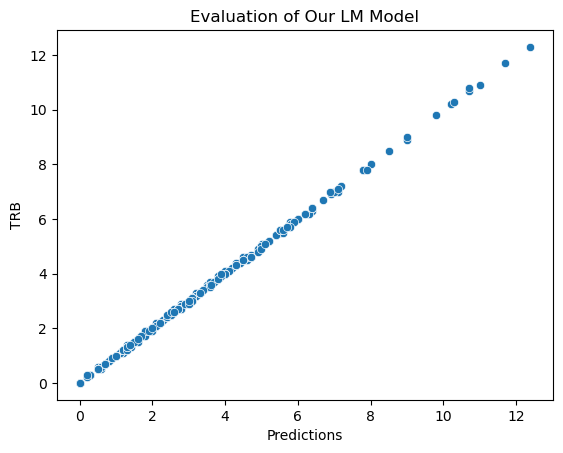

In [55]:
sns.scatterplot(x=ytrb_pred, y=ytrb_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Our LM Model")

In [56]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(ytrb_test, ytrb_pred))
print("R-squared:", r2_score(ytrb_test, ytrb_pred))
print("RMSE: ", math.sqrt(mean_squared_error(ytrb_test, ytrb_pred)))

Mean Squared Error: 0.001619141110096366
R-squared: 0.9996923859039266
RMSE:  0.04023855253480629


#### Predicting Assists and Turnover Relationship

In [57]:
X_ast_tov = df[['MP', 'PTS', 'TOV']]
y_ast_tov = df['AST']

# Split data into training and testing sets
X_ast_tov_train, X_ast_tov_test, y_ast_tov_train, y_ast_tov_test = train_test_split(X_ast_tov, y_ast_tov, test_size=0.2, random_state=42)

In [58]:
# Create a linear regression model
model_ast_tov = LinearRegression()

# Fit the model using the training data
model_ast_tov.fit(X_ast_tov_train, y_ast_tov_train)

LinearRegression()

In [59]:
model_ast_tov.coef_

array([0.03535767, 0.04973103, 1.05062038])

In [60]:
# Predict on the test data
y_ast_tov_pred = model_ast_tov.predict(X_ast_tov_test)

y_ast_tov_pred

array([ 2.24141648e+00,  4.96522742e-01,  5.48052514e+00,  8.82032059e-01,
        3.85288385e+00,  1.40974385e+00,  4.03709680e-02,  2.05706897e+00,
        2.45670973e+00,  4.58094329e-01,  2.73967735e+00,  1.88327238e-01,
        4.86691681e-01,  1.28067347e+00,  1.82906640e+00,  1.17234907e+00,
        5.08434932e+00,  2.15751789e+00,  3.50448520e+00,  1.93415485e-01,
        2.00987728e+00,  9.00602279e-01, -6.67085752e-02,  2.02142267e+00,
        5.52577786e+00,  1.99900102e+00,  1.79440404e+00,  8.81174893e-01,
        9.93528884e-02,  1.36385981e+00,  1.27558522e+00,  7.66281794e-01,
        8.42981218e-01,  4.20246086e-01,  3.80307451e-01,  1.28964736e+00,
        7.56420963e-01,  1.29508104e+00,  5.15050543e+00,  1.70122479e+00,
        9.68442951e-01,  2.12791760e+00,  4.12634052e+00,  6.80997023e-01,
        1.61772724e+00,  2.04103712e-01,  3.67104232e+00,  3.24250908e+00,
        2.46388392e+00,  2.54807050e-01,  5.47925844e-01,  3.56268284e+00,
        2.11094320e-01,  

Text(0.5, 1.0, 'Evaluation of Our LM Model')

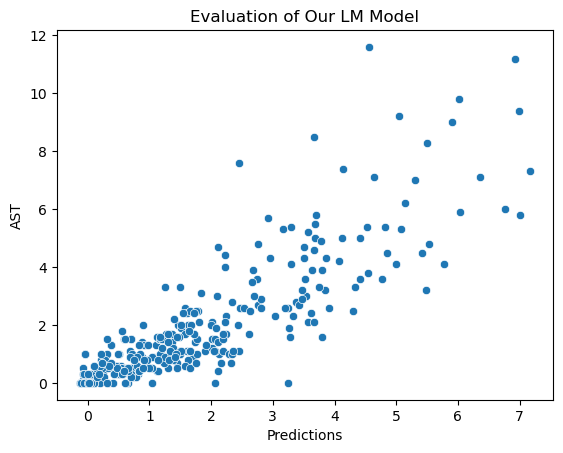

In [61]:
sns.scatterplot(x=y_ast_tov_pred, y=y_ast_tov_test)
plt.xlabel("Predictions")
plt.title("Evaluation of Our LM Model")

In [62]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_ast_tov_test, y_ast_tov_pred))
print("R-squared:", r2_score(y_ast_tov_test, y_ast_tov_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_ast_tov_test, y_ast_tov_pred)))

Mean Squared Error: 1.224608951497014
R-squared: 0.7160642649177342
RMSE:  1.106620509251936
